In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#going through xlsx file. This has multiple datasets. 

def reindex_sheet(sheet_name, skiprownumber): #functions will streamline the process as we have multiple sheets to reindex.
    skip_rows = skiprownumber
    df1 = pd.read_excel("datasets/master_productivityds.xlsx", sheet_name=sheet_name, skiprows=skip_rows)
    
    df1.rename(
        columns={'Activities of head offices; management consultancy activities': 'Management Consulting'}, 
        inplace=True
    )

    isolated_df = df1[['Quarter', 'Management Consulting']].copy()
    # changing from index=2023 to index=2025
    val_2023 = isolated_df.loc[isolated_df['Quarter'] == '2023 Q1', 'Management Consulting'].values[0]
    val_2025 = isolated_df.loc[isolated_df['Quarter'] == '2025 Q1', 'Management Consulting'].values[0]
    scaling_factor = val_2025 / val_2023 * 100
    
    isolated_df.loc[:, 'Management Consulting (Index 2025)'] = (
        isolated_df['Management Consulting'] * scaling_factor / 100
    )
    
    reindexed_df = isolated_df.drop('Management Consulting', axis=1)
    return reindexed_df

GVA2025_table23 = reindex_sheet("Table_23", [0,1,2,4,5,6])
HoursWorked2025_table25 = reindex_sheet("Table_25", [0,1,2,3,5,6,7])
HourlyOutput2025_table27 = reindex_sheet("Table_27", [0,1,2,3,5,6,7])



   Quarter  Management Consulting (Index 2025)
0  1997 Q1                           59.678169
1  1997 Q2                           64.226032
2  1997 Q3                           69.323434
3  1997 Q4                           66.713517
4  1998 Q1                           67.110871


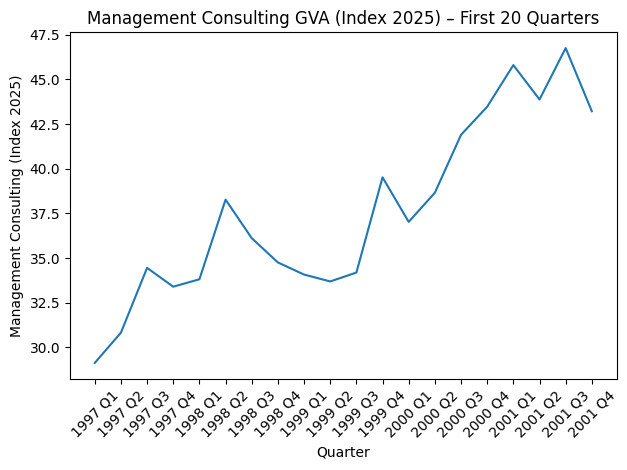

In [32]:
plt.figure()
plt.plot(GVA2025_table23['Quarter'].iloc[:20], GVA2025_table23['Management Consulting (Index 2025)'].iloc[:20])
plt.xticks(rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Management Consulting (Index 2025)')
plt.title('Management Consulting GVA (Index 2025) – First 20 Quarters')
plt.tight_layout()
plt.show()